In [99]:
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [100]:
#df for total energy
df_energy = pd.read_excel('Graphs - Data Comparison.xlsx', sheet_name='energy_per_sec')
df_time = pd.read_excel('Graphs - Data Comparison.xlsx', sheet_name='exec_time')

In [77]:
df_energy.tail(11)

,Workload,Lab's System,i7 - 4770 (2013),i7 - 4790 (2014),M1,M2
4,MapReduceSort - chunk size (50) - num_proc (4)...,3179.29,3407,4769,4916.00,6318.00
5,MapReduceSort - chunk size (50) - num_proc (4)...,3049.45,3064,4827,4834.00,5410.00
6,MapReduceSort - chunk size (100) - num_proc (4...,2947.11,3127,5353,4773.00,5249.00
7,MapReduceSort - chunk size (30) - num_proc (4)...,2954.73,3111,4700,4939.00,5050.00
8,MapReduceSort - chunk size (20) - num_proc (4)...,2903.00,3096,4809,4980.00,4865.00
9,Fibonacci - Size (2M) - Workers - 1/2th,NaN,7197,8957,15466.00,13509.00
10,Fibonacci - Size (2M) - Workers - 3/4th,NaN,9469,10071,15289.00,13245.00
11,Fibonacci - Size (2M) - Workers - all,NaN,12432,12879,16990.00,17018.00
12,GetPrime - Size (100M) - Workers - 1/2th,NaN,4337,6497,11259.00,9038.50
13,GetPrime - Size (100M) - Workers - 3/4th,NaN,6434,8125,8847.55,12489.28


In [4]:
df_time.head(4)

,Workload,Lab's System,i7 - 4770 (2013),i7 - 4790 (2014),M1,M2
0,Matrix Mulx (500),19.0,17.0,12.0,8.94,7.47
1,Matrix Mulx (800),364.0,80.0,12.0,37.64,31.34
2,Matrix Mulx (1000),737.0,203.0,125.0,74.14,61.25
3,Matrix Mulx (1200),1272.0,291.0,236.0,130.39,107.21


In [101]:
columns = df_energy.columns[1:]

In [17]:
columns

Index(['Lab's System', 'i7 - 4770 (2013)', 'i7 - 4790 (2014)', 'M1', 'M2'], dtype='object')

In [102]:
columns
from constant import EMISSIONS
from SaveInEmission import SaveInEmission

In [7]:
df_time.head(9).tail(5)

,Workload,Lab's System,i7 - 4770 (2013),i7 - 4790 (2014),M1,M2
4,MapReduceSort - chunk size (50) - num_proc (4)...,78.0,31.50,28.0,15.10,13.36
5,MapReduceSort - chunk size (50) - num_proc (4)...,175.0,60.50,64.5,32.68,29.45
6,MapReduceSort - chunk size (100) - num_proc (4...,144.0,54.25,54.4,26.32,23.31
7,MapReduceSort - chunk size (30) - num_proc (4)...,187.0,70.50,63.0,38.08,34.83
8,MapReduceSort - chunk size (20) - num_proc (4)...,187.0,74.50,76.5,41.55,38.55


In [66]:
workloads, exec_time, energy, machines = [], [], [], columns
for index, row in df_time.head(4).iterrows():
    workloads.append(row['Workload'])
    exec_time.append([row["Lab's System"], row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])

for index, row in df_energy.head(4).iterrows():
    energy.append([row["Lab's System"], row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])

save_in_emission, embodied_emission, energy_emission = [], [], []

embodied_emission_m2 = EMISSIONS.get("M2")
avg_co2_emission = 121
expected_age = 4
for i in range(len(workloads)):
    saved_emission_workload, embodied_save_workload, energy_save_workload = [], [], []
    for m in range(len(energy[i])-1):
        new_energy = energy[i][-1]
        old_energy = energy[i][m]
        
        k = SaveInEmission(
        embodied_em_new=embodied_emission_m2,
        energy_avg_old=old_energy,
        energy_avg_new=new_energy,
        expected_age=expected_age,
        emission_per_unit=avg_co2_emission,
    )
        
        old_exec_time = exec_time[i][m]
        new_exec_time = exec_time[i][-1]
        
        output_emission = k.saved_emission(new_time=new_exec_time, old_time=old_exec_time, optimum_carbon=True)
        print(output_emission)
        saved_emission_workload.append(output_emission.get('total_save'))
        embodied_save_workload.append(output_emission.get('embodied_save'))
        energy_save_workload.append(output_emission.get('energy_save'))
    saved_emission_workload.append(0)
    embodied_save_workload.append(0)
    energy_save_workload.append(0)
    save_in_emission.append(saved_emission_workload)
    embodied_emission.append(embodied_save_workload)
    energy_emission.append(energy_save_workload)

Older machine is using lesser energy than newer machine, so higher the CO2 emission higher the save in emission
{'embodied_save': 8.705051369863015e-06, 'energy_save': 6.051868777777778e-07, 'total_save': 9.310238247640792e-06}
carbon per unit should be lower than - 1113.621363561821 gCO2 kWh
{'embodied_save': 8.705051369863015e-06, 'energy_save': -9.458432194444443e-07, 'total_save': 7.759208150418571e-06}
Older machine is using lesser energy than newer machine, so higher the CO2 emission higher the save in emission
{'embodied_save': 8.705051369863015e-06, 'energy_save': 9.740570583333333e-07, 'total_save': 9.679108428196348e-06}
Older machine is using lesser energy than newer machine, so higher the CO2 emission higher the save in emission
{'embodied_save': 8.705051369863015e-06, 'energy_save': 6.828503916666666e-07, 'total_save': 9.387901761529682e-06}
carbon per unit should be lower than - 161.8045576136241 gCO2 kWh
{'embodied_save': 3.652159436834095e-05, 'energy_save': -2.73114242

In [174]:
def emission_data(avg_co2, df_time, df_energy, life_expectancy=4, consider_lab_system=True):
    workloads, exec_time, energy = [], [], []
    if consider_lab_system:
        for index, row in df_time.iterrows():
            workloads.append(row['Workload'])
            exec_time.append([row["Lab's System"], row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])
        
        for index, row in df_energy.iterrows():
            energy.append([row["Lab's System"], row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])
        machines = columns
    else:
        for index, row in df_time.iterrows():
            workloads.append(row['Workload'])
            exec_time.append([row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])
        
        for index, row in df_energy.iterrows():
            energy.append([row["i7 - 4770 (2013)"], row["i7 - 4790 (2014)"], row["M1"], row["M2"]])
        machines = columns[1:]
        
    save_in_emission, embodied_emission, energy_emission = [], [], []
    
    embodied_emission_m2 = EMISSIONS.get("M2")
    avg_co2_emission = avg_co2
    expected_age = life_expectancy
    for i in range(len(workloads)):
        saved_emission_workload, embodied_save_workload, energy_save_workload = [], [], []
        for m in range(len(energy[i])-1):
            new_energy = energy[i][-1]
            old_energy = energy[i][m]
            
            k = SaveInEmission(
            embodied_em_new=embodied_emission_m2,
            energy_avg_old=old_energy,
            energy_avg_new=new_energy,
            expected_age=expected_age,
            emission_per_unit=avg_co2_emission,
        )
            
            old_exec_time = exec_time[i][m]
            new_exec_time = exec_time[i][-1]
            
            output_emission = k.saved_emission(new_time=new_exec_time, old_time=old_exec_time)
            saved_emission_workload.append(output_emission.get('total_save'))
            embodied_save_workload.append(output_emission.get('embodied_save'))
            energy_save_workload.append(output_emission.get('energy_save'))
        saved_emission_workload.append(0)
        embodied_save_workload.append(0)
        energy_save_workload.append(0)
        save_in_emission.append(saved_emission_workload)
        embodied_emission.append(embodied_save_workload)
        energy_emission.append(energy_save_workload)
        
    return dict(total_save=save_in_emission, avoided_emission=embodied_emission, energy_save=energy_emission, machines=machines)

In [156]:
def draw_graphs(metric_data, workload_index, workload, util, consider_lab_system=True, save=False, file_name='jebrish.png'):
    import numpy as np
    if consider_lab_system:
        observations = ["Intel-CoreDuo(2009)", "i7-4770(2013)", "i7-4790(2014)", "M1(2020)"]
    else:
        observations = ["i7-4770(2013)", "i7-4790(2014)", "M1(2020)"]
    bar_width = 0.1
    
    # Sample values for each observation (3 bars per observation)
    data = {
        'Embodied Emission': metric_data.get('avoided_emission')[workload_index][:-1],
        'Operational Emission': metric_data.get('energy_save')[workload_index][:-1],
        'Overall Emission': metric_data.get('total_save')[workload_index][:-1]
    }
    
    # Generate x locations for the groups
    x = np.arange(len(observations))
    
    # Create bars
    fig, ax = matplotlib.pyplot.subplots(figsize=(5, 3))
    for i, (category, values) in enumerate(data.items()):
        ax.bar(x + i*bar_width, values, bar_width, label=category)
    
    # Add some text for labels, title and axes ticks
    ax.set_ylabel('Save in Emission (%)', fontsize=12)
    # ax.set_title(f'{workload} - Avg CPU Utilization {util}%')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(observations, fontsize=8)
    ax.legend()
    
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # matplotlib.pyplot.ylim(1.5*min(metric_data.get('energy_save')[workload_index][:-1]), 2*max(metric_data.get('total_save')[workload_index][:-1]))

    if save:
        matplotlib.pyplot.savefig(file_name, bbox_inches='tight')
    else:
        matplotlib.pyplot.show()

{'total_save': [[15.640798576560295, 25.917201114243294, 62.835534532910756, 66.93534911534799, 0], [-1.904932819117237, 27.108719443525757, 49.874415391153235, 57.536535594294136, 0], [-2.4380202555121775, 48.669462255594496, 51.473451403190296, 56.99243514653919, 0], [9.752300207026481, 70.30516834206767, 63.10289087843157, 58.46687326471473, 0], [-1.7968652957725297, 56.539866063542746, 37.532890342871674, 65.02597980929917, 0]], 'avoided_emission': [[49.68779636488949, 49.68779636488949, 49.68779636488949, 49.68779636488949, 0], [51.238647241154375, 51.238647241154375, 51.238647241154375, 51.238647241154375, 0], [51.14073906341727, 51.14073906341727, 51.14073906341727, 51.14073906341727, 0], [51.052055760013836, 51.052055760013836, 51.052055760013836, 51.052055760013836, 0], [58.29706145690496, 58.29706145690496, 58.29706145690496, 58.29706145690496, 0]], 'energy_save': [[-34.0469977883292, -23.7705952506462, 13.147738168021258, 17.2475527504585, 0], [-53.143580060271624, -24.12992

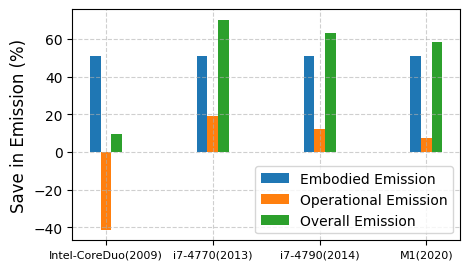

In [164]:
# metric_data = emission_data(475, df_time.head(9).tail(5), df_energy.head(9).head(5), consider_lab_system=True)
# print(metric_data)
# draw_graphs(metric_data, 2, 'MapReduce-Size(1000)', 20, consider_lab_system=True, save=True, file_name='MapReduce_paper_475.png')

metric_data = emission_data(475, df_time.head(9).tail(5), df_energy.head(9).head(5), consider_lab_system=True)
print(metric_data)
draw_graphs(metric_data, 3, 'MapReduce-Size(1000)', 20, consider_lab_system=True, save=True, file_name='MapReduce_paper_475.png')

In [177]:
def mark_the_points(data, workload_index, workload, consider_lab_system=True, save=False, file_name='jebrish.png'):    
    # Sample data: 4 observations for 3 machines
    observations = ['14 \n France', '71 \n Netherlands', '475 \n Global Average', '872 \n South Carolina']
    m2009, m2013, m2014, m2020 = [], [], [], []
    for d in data:
        if consider_lab_system:
            m2009.append([d['total_save'][workload_index][0]])
            m2013.append([d['total_save'][workload_index][1]])
            m2014.append([d['total_save'][workload_index][2]])
            m2020.append([d['total_save'][workload_index][3]])
        else:
            m2013.append([d['total_save'][workload_index][0]])
            m2014.append([d['total_save'][workload_index][1]])
            m2020.append([d['total_save'][workload_index][2]])
    # Create a figure and axis
    matplotlib.pyplot.figure(figsize=(5, 3))
    # Plot data for each machine
    if consider_lab_system:
        matplotlib.pyplot.plot(observations, m2009, marker='o', label="Intel-CoreDuo(2009)")
    matplotlib.pyplot.plot(observations, m2013, marker='o', label="i7-4770(2013)")
    matplotlib.pyplot.plot(observations, m2014, marker='o', label="i7-4790(2014)")
    matplotlib.pyplot.plot(observations, m2020, marker='o', label="M1(2020)")
    
    # Add labels and title
    matplotlib.pyplot.xlabel('Carbon Emissions gCO2/kWh', fontsize=7)
    matplotlib.pyplot.ylabel('Save in Emission (Kg)', fontsize=12)
    # matplotlib.pyplot.title(f'{workload} - different carbon emission rates')
    matplotlib.pyplot.legend()    
    matplotlib.pyplot.xticks(fontsize=7)
    # Show grid for better readability
    matplotlib.pyplot.grid(True)
    
    if save:
        matplotlib.pyplot.savefig(file_name, bbox_inches='tight')
    else:
        matplotlib.pyplot.show()


{'total_save': [[1.5545907794410956e-05, 1.5565709044410958e-05, 1.556651890552207e-05, 1.5568681088855403e-05, 0], [3.420338711246195e-05, 3.430825002912861e-05, 3.430630558468417e-05, 3.431833106979528e-05, 0], [2.7085428530952056e-05, 2.71546232878965e-05, 2.7154559908729835e-05, 2.7163374532729833e-05, 0], [4.045734018164308e-05, 4.057400198719863e-05, 4.0577895737198635e-05, 4.0587691512309745e-05, 0], [4.479344740774353e-05, 4.490785365774353e-05, 4.490667921329909e-05, 4.492272417579909e-05, 0]], 'avoided_emission': [[1.5568873668188736e-05, 1.5568873668188736e-05, 1.5568873668188736e-05, 1.5568873668188736e-05, 0], [3.4319111491628614e-05, 3.4319111491628614e-05, 3.4319111491628614e-05, 3.4319111491628614e-05, 0], [2.7163955479452056e-05, 2.7163955479452056e-05, 2.7163955479452056e-05, 2.7163955479452056e-05, 0], [4.058861301369863e-05, 4.058861301369863e-05, 4.058861301369863e-05, 4.058861301369863e-05, 0], [4.492365867579909e-05, 4.492365867579909e-05, 4.492365867579909e-05, 

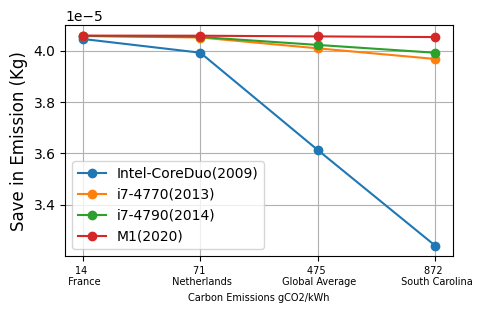

In [179]:
# final_data = []
# for emission_rate in [14, 71, 475, 872]:
#     metric_data = emission_data(emission_rate, df_time.head(4), df_time.head(4), consider_lab_system=True)
#     print(metric_data)
#     final_data.append(metric_data)
# mark_the_points(final_data, 2, '',consider_lab_system=True, save=True, file_name='MatrixMulx_paper_475_location.png')
# # 
final_data = []
for emission_rate in [14, 71, 475, 872]:
    metric_data = emission_data(emission_rate, df_time.head(9).tail(5), df_time.head(9).tail(5), consider_lab_system=True)
    print(metric_data)
    final_data.append(metric_data)
mark_the_points(final_data, 3, '',consider_lab_system=True, save=True, file_name='MapReduce_paper_475_location.png')


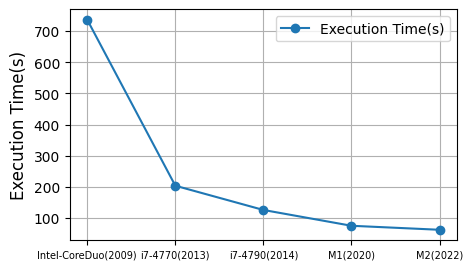

In [173]:
matplotlib.pyplot.figure(figsize=(5, 3))

matplotlib.pyplot.plot(["Intel-CoreDuo(2009)", "i7-4770(2013)", "i7-4790(2014)", "M1(2020)", "M2(2022)"], [737, 203, 125, 74.14, 61.25], marker='o', label="Execution Time(s)")

# matplotlib.pyplot.plot(["Intel-CoreDuo(2009)", "i7-4770(2013)", "i7-4790(2014)", "M1(2020)", "M2(2022)"], [187, 70.5, 63, 38.08, 34.83], marker='o', label="Execution Time(s)")

# Add labels and title
matplotlib.pyplot.ylabel('Execution Time(s)', fontsize=12)
matplotlib.pyplot.legend()    
matplotlib.pyplot.xticks(fontsize=7)
# Show grid for better readability
matplotlib.pyplot.grid(True)
matplotlib.pyplot.savefig("execution_time_s_MatrixMulx", bbox_inches='tight')

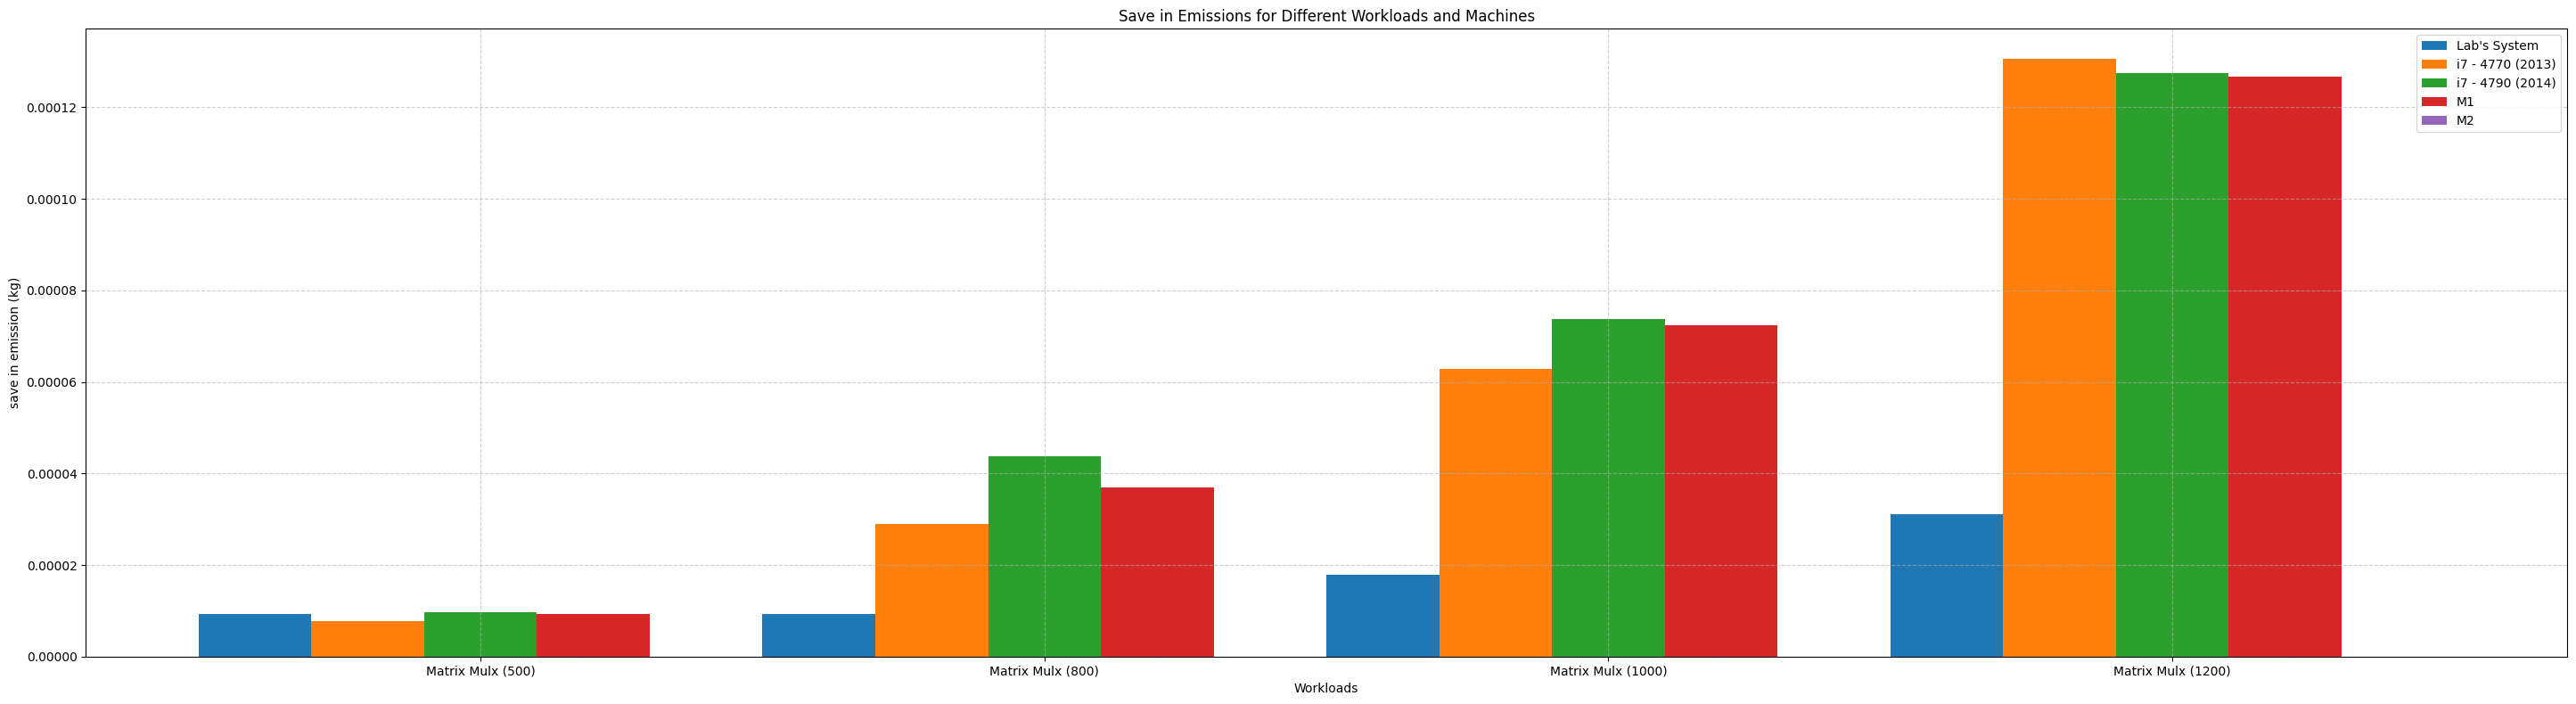

In [131]:
bar_width = 0.2

num_workloads = len(workloads)
num_machines = len(machines)
indices = np.arange(num_workloads)


# Create a figure and axis
fig, ax = matplotlib.pyplot.subplots(figsize=(29, 8))

# Plot bars for each machine
for i in range(num_machines):
    ax.bar(indices + i * bar_width, 
           [save_in_emission[j][i] for j in range(num_workloads)], 
           bar_width, 
           label=machines[i])
    
# Add titles and labels
ax.set_title('Save in Emissions for Different Workloads and Machines')
ax.set_xlabel('Workloads')
ax.set_ylabel('save in emission (kg)')
ax.set_xticks(indices + bar_width * (num_machines - 1) / 2)
ax.set_xticklabels(workloads)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
matplotlib.pyplot.show()
# matplotlib.pyplot.savefig('mapReduce_872_south_carolina.png')

In [42]:
save_in_emission

[[8.775072992085237e-06,
  8.595614964307459e-06,
  8.817752186529682e-06,
  8.784058853196348e-06,
  0],
 [3.336159486834095e-05,
  3.5643221535007614e-05,
  3.7361877090563166e-05,
  3.658046926834095e-05,
  0],
 [6.517884758234398e-05,
  7.037965072678844e-05,
  7.164101961567733e-05,
  7.149006103789954e-05,
  0],
 [0.00011408118760334857,
  0.00012559392427001522,
  0.00012522725649223747,
  0.0001251336156255708,
  0]]

0.7000000000000001 0.7000000000000001
1.7000000000000002 1.7000000000000002
2.6999999999999997 2.6999999999999997
3.6999999999999997 3.6999999999999997


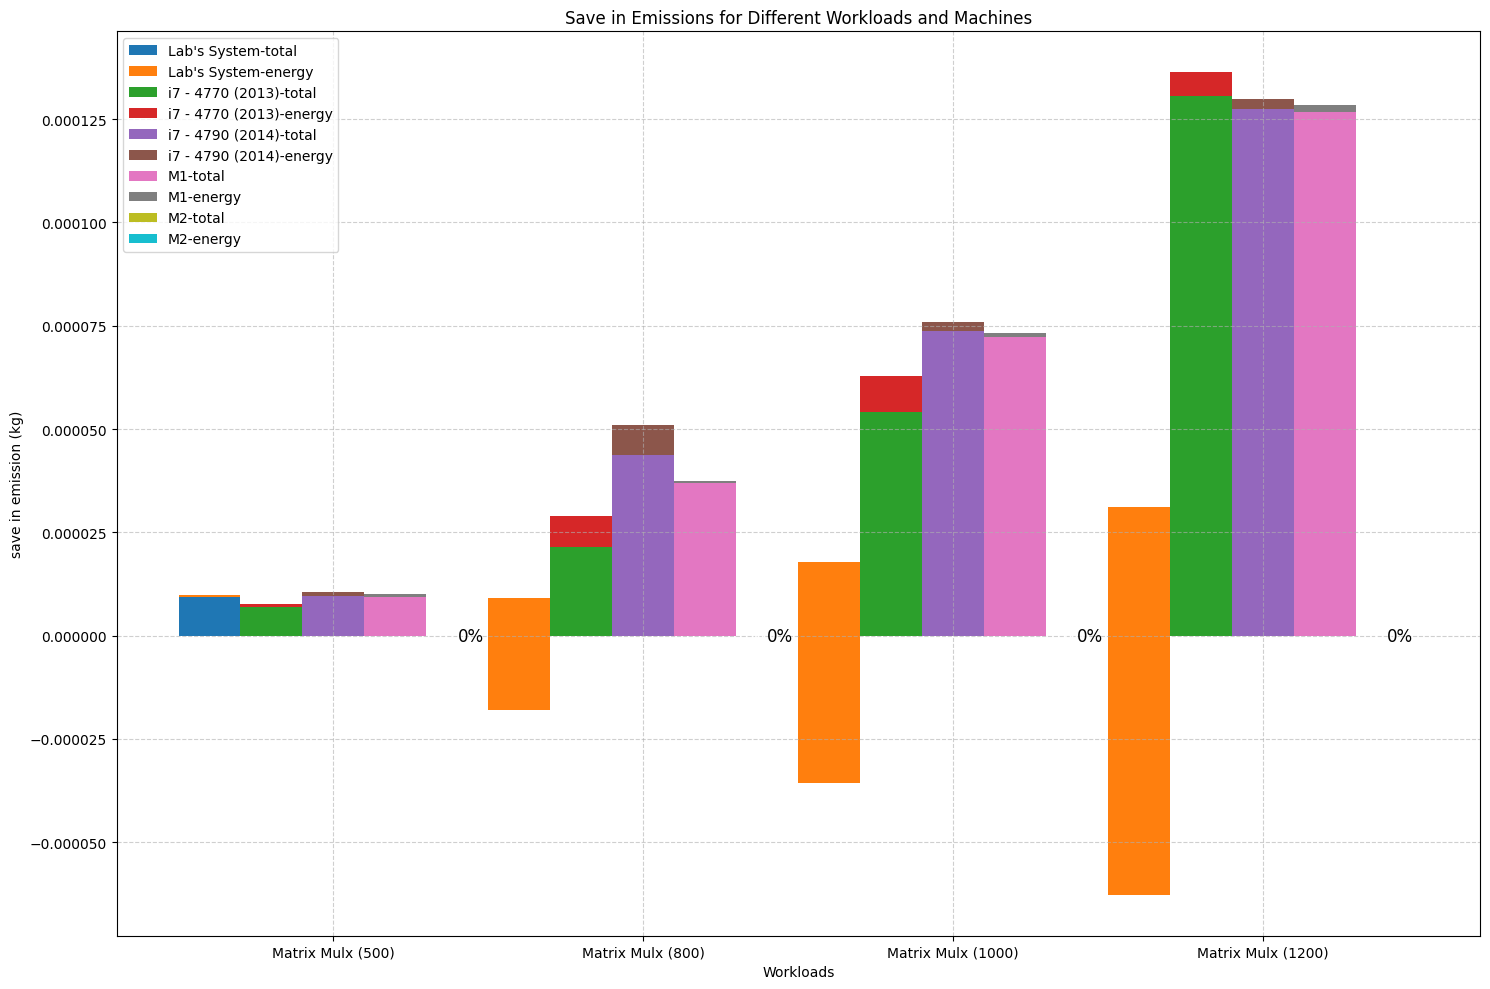

In [70]:
bar_width = 0.2

num_workloads = len(workloads)
num_machines = len(machines)
indices = np.arange(num_workloads)


# Create a figure and axis
fig, ax = matplotlib.pyplot.subplots(figsize=(15, 10))

# Plot bars for each machine
for i in range(num_machines):
    # ax.bar(indices + i * bar_width, 
    #        [save_in_emission[j][i] for j in range(num_workloads)], 
    #        bar_width, 
    #        label=machines[i])
    bars1 = ax.bar(indices + i * bar_width, 
           [save_in_emission[j][i] for j in range(num_workloads)], 
           bar_width, 
           label=machines[i]+'-total')
    bars2 = ax.bar(indices + i * bar_width,
           [energy_emission[j][i] for j in range(num_workloads)], 
           bar_width, bottom=[save_in_emission[j][i] for j in range(num_workloads)],
           label=machines[i]+'-energy')
    
# Add titles and labels
ax.set_title('Save in Emissions for Different Workloads and Machines')
ax.set_xlabel('Workloads')
ax.set_ylabel('save in emission (kg)')
ax.set_xticks(indices + bar_width * (num_machines - 1) / 2)
ax.set_xticklabels(workloads)

for idx, rect1, rect2 in zip(indices, bars1, bars2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    print(rect1.get_x(), rect2.get_x())
    ax.text(rect1.get_x() + rect1.get_width() / 2, height1 / 2, f'{height1}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(rect2.get_x() + rect2.get_width() / 2, height1 + height2 / 2, f'{height2}%', ha='left', va='center', color='black', fontsize=12)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
# matplotlib.pyplot.show()
matplotlib.pyplot.savefig('jebrish.png')

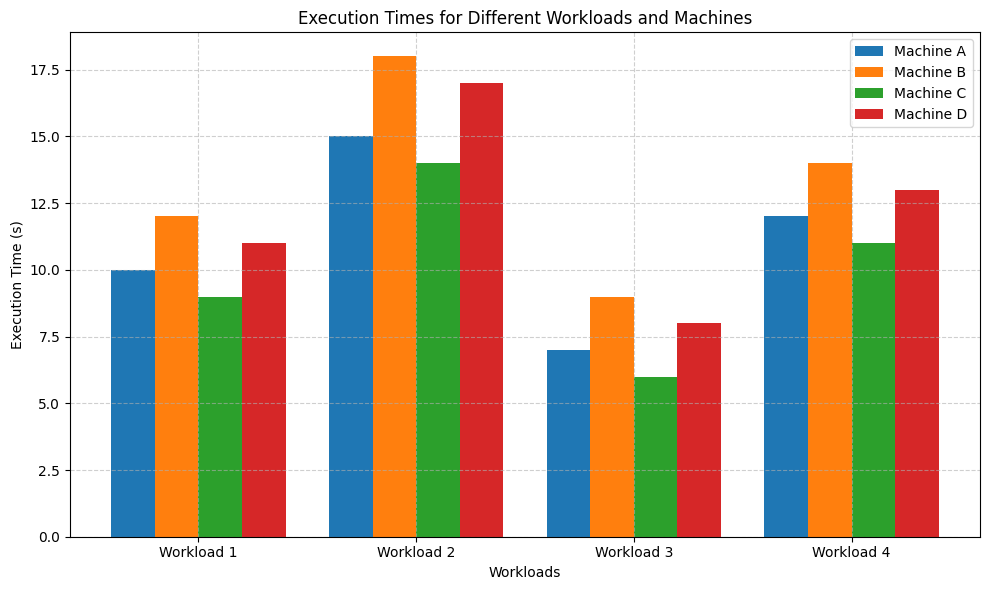

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
workloads = ['Workload 1', 'Workload 2', 'Workload 3', 'Workload 4']
machines = ['Machine A', 'Machine B', 'Machine C', 'Machine D']
execution_times = [
    [10, 12, 9, 11],  # Execution times for Workload 1
    [15, 18, 14, 17], # Execution times for Workload 2
    [7, 9, 6, 8],     # Execution times for Workload 3
    [12, 14, 11, 13]  # Execution times for Workload 4
]

# Number of workloads and machines
num_workloads = len(workloads)
num_machines = len(machines)

# Bar width and positions
bar_width = 0.2
indices = np.arange(num_workloads)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each machine
for i in range(num_machines):
    ax.bar(indices + i * bar_width, 
           [execution_times[j][i] for j in range(num_workloads)], 
           bar_width, 
           label=machines[i])

# Add titles and labels
ax.set_title('Execution Times for Different Workloads and Machines')
ax.set_xlabel('Workloads')
ax.set_ylabel('Execution Time (s)')
ax.set_xticks(indices + bar_width * (num_machines - 1) / 2)
ax.set_xticklabels(workloads)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
plt.show()


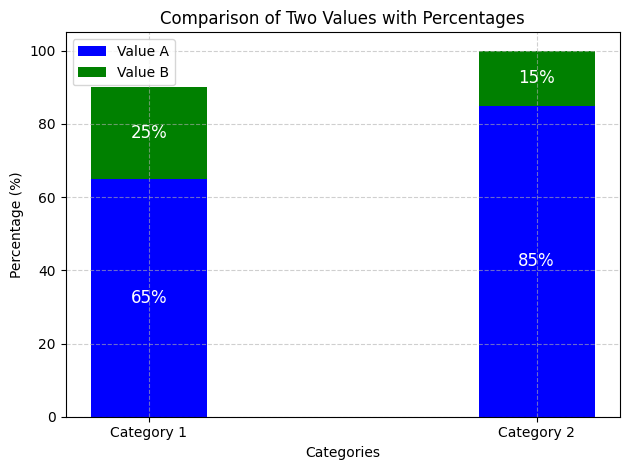

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2']
values_a = [65, 85]  # Percentages for the first value set
values_b = [25, 15]  # Percentages for the second value set

# Bar width and positions
bar_width = 0.3
indices = np.arange(len(categories))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot stacked bars for each value set
bars1 = ax.bar(indices, values_a, bar_width, label='Value A', color='blue')
bars2 = ax.bar(indices, values_b, bar_width, bottom=values_a, label='Value B', color='green')

# Add titles and labels
ax.set_title('Comparison of Two Values with Percentages')
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(indices)
ax.set_xticklabels(categories)

# Add percentage labels inside the bars
for idx, rect1, rect2 in zip(indices, bars1, bars2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    
    ax.text(rect1.get_x() + rect1.get_width() / 2, height1 / 2, f'{height1}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(rect2.get_x() + rect2.get_width() / 2, height1 + height2 / 2, f'{height2}%', ha='center', va='center', color='white', fontsize=12)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
plt.show()


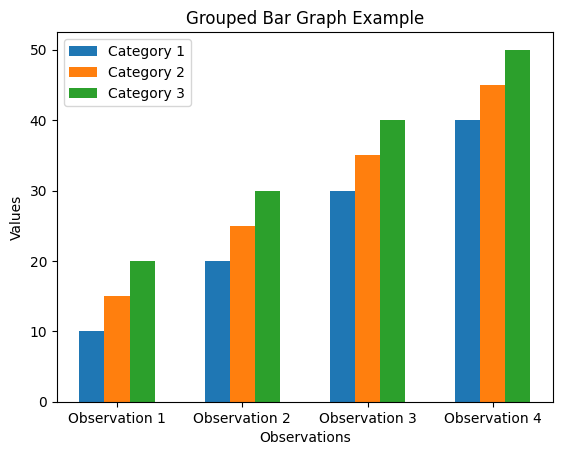

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
observations = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4']
bar_width = 0.2

# Sample values for each observation (3 bars per observation)
data = {
    'Category 1': [10, 20, 30, 40],
    'Category 2': [15, 25, 35, 45],
    'Category 3': [20, 30, 40, 50]
}

# Generate x locations for the groups
x = np.arange(len(observations))

# Create bars
fig, ax = plt.subplots()
for i, (category, values) in enumerate(data.items()):
    ax.bar(x + i*bar_width, values, bar_width, label=category)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Observations')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Graph Example')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(observations)
ax.legend()

plt.show()


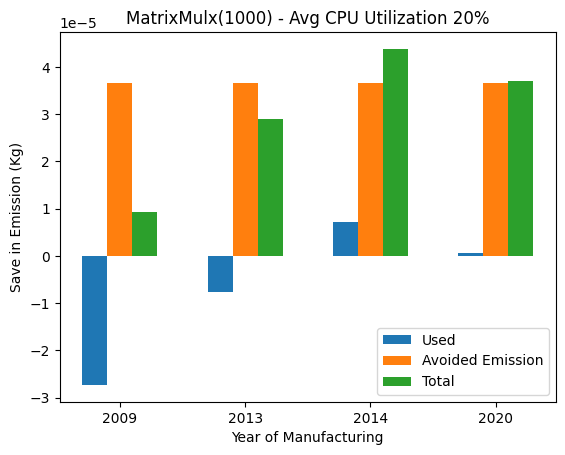

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
observations = ['2009', '2013', '2014', '2020']
bar_width = 0.2

# Sample values for each observation (3 bars per observation)
data = {
    'Used': energy_emission[1][:-1],
    'Embodied Emission': embodied_emission[1][:-1],
    'Total': save_in_emission[1][:-1]
}

# Generate x locations for the groups
x = np.arange(len(observations))

# Create bars
fig, ax = matplotlib.pyplot.subplots()
for i, (category, values) in enumerate(data.items()):
    ax.bar(x + i*bar_width, values, bar_width, label=category)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Year of Manufacturing')
ax.set_ylabel('Save in Emission (Kg)')
ax.set_title('MatrixMulx(1000) - Avg CPU Utilization 20%')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(observations)
ax.legend()

matplotlib.pyplot.show()


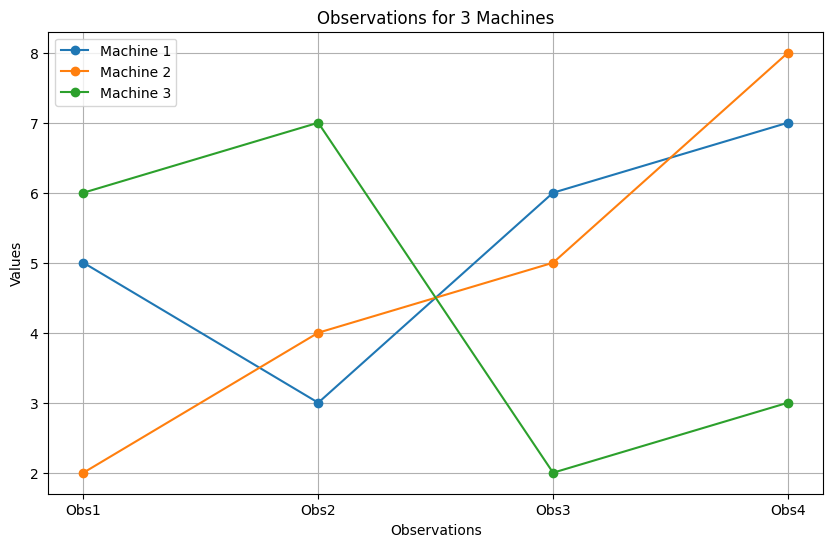

In [159]:
import matplotlib.pyplot as plt

# Sample data: 4 observations for 3 machines
observations = ['Obs1', 'Obs2', 'Obs3', 'Obs4']
machine1 = [5, 3, 6, 7]
machine2 = [2, 4, 5, 8]
machine3 = [6, 7, 2, 3]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot data for each machine
plt.plot(observations, machine1, marker='o', label='Machine 1')
plt.plot(observations, machine2, marker='o', label='Machine 2')
plt.plot(observations, machine3, marker='o', label='Machine 3')

# Add labels and title
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Observations for 3 Machines')
plt.legend()

# Show grid for better readability
plt.grid(True)

# Show plot
plt.show()
